# Unsupervised Learning - Clustering - Customer Segmentation

- Customer data exploration
- Data pre-processing
- Data Analysis
- Determining Optimum number of Clusters
- K-means clustering
- Visualisation

<br>

### References

Source code and tutorial by:
- Siddhardhan (2021) Project 13. Customer Segmentation using K-Means Clustering with Python | Machine Learning Projects https://www.youtube.com/watch?v=SrY0sTJchHE

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans

## Explore data

In [4]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.shape

(200, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
X = df.iloc[:, [3, 4]].values
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

WCSS (Within Cluster Squares)

In [13]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)

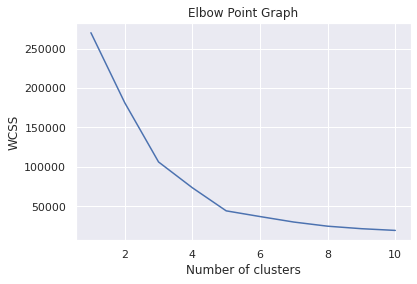

In [16]:
# an elbow graph
# Find the sharpest drop in WCSS. We determine that the optimal value is n_cluster = 5

sb.set()
plt.plot(range(1, 11), wcss)
plt.title('Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Train K-Means Clustering Model

In [17]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

# Return a label for each data point based on their cluster
y = kmeans.fit_predict(X)
print(y)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


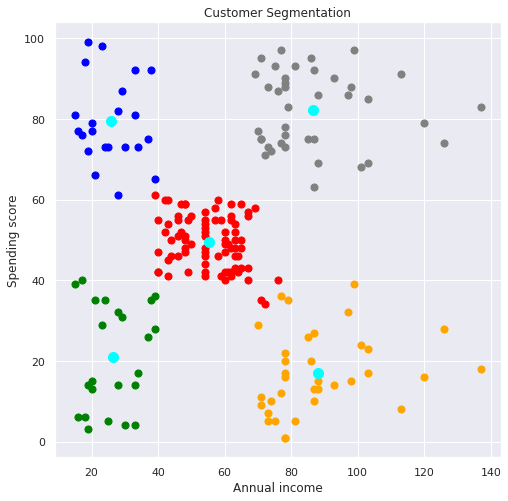

In [25]:
# Plotting all the clusters with centroids

# Plot by X = annual income, y = spending score
# X[y==annual income, column_0], X[y==Spending score, column_1]

plt.figure(figsize=(8,8))
plt.scatter(X[y==0,0], X[y==0,1], s=50, c='red', label='Cluster 1')
plt.scatter(X[y==1,0], X[y==1,1], s=50, c='orange', label='Cluster 2')
plt.scatter(X[y==2,0], X[y==2,1], s=50, c='green', label='Cluster 3')
plt.scatter(X[y==3,0], X[y==3,1], s=50, c='blue', label='Cluster 4')
plt.scatter(X[y==4,0], X[y==4,1], s=50, c='gray', label='Cluster 5')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='cyan', label='Centroids')

plt.title("Customer Segmentation")
plt.xlabel("Annual income")
plt.ylabel("Spending score")

plt.savefig("Unsupervised learning - clustering.png")